### Importing necessary libraries

In [1]:
import pandas as pd                                   # Here we have imported 'pandas' for data manipulation and analysis
import numpy as np                                    # 'numpy' for numerical operations
from sklearn.preprocessing import StandardScaler      # 'StandardScaler' standardizes features by removing the mean and scaling to unit variance
import matplotlib.pyplot as plt                       # 'matplotlib.pyplot' for data visualization
import seaborn as sns                                 # 'seaborn' for statistical data visualization

### Loading the dataset from an Excel file

In [2]:
df=pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name='data')     # Read data from the specified sheet in the Excel file
df                                                                       # Display the DataFrame to see the loaded data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# **Data Preprocessing**

### Handling Missing Values

In [3]:
df.info()     # Display information about DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
missing_values = df.isnull().sum()     # Checking missing values in each columns
missing_values

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


### Detecting and removing outliers

In [5]:
def detect_outliers_iqr(df, column):       # Defines function that accept DataFrame and column name to remove outliers
    Q1 = df[column].quantile(0.25)         # Calculates 25th percentile i.e first quartile for column
    Q3 = df[column].quantile(0.75)         # Calculates 75th percentile i.e third quartile for column
    IQR = Q3 - Q1                          # Computes Interquartile Range that is difference between Q3 and Q1

    # Any value below lower bound and above upper bound considered an outlier
    lower_bound = Q1 - 1.5 * IQR      # Sets limit to identiy outlier
    upper_bound = Q3 + 1.5 * IQR      # # Sets limit to identiy outlier

    # Return outliers
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [6]:
columns_to_check = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
                    'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

In [7]:
outliers = {}   # Initializing dictionary to store outlier in each column

In [8]:
# Loop through each column and detect outlier using IQR method
for column in columns_to_check:
    outliers[column] = detect_outliers_iqr(df, column)

In [9]:
# Printing number of outliers detected in each column
for col, outlier_data in outliers.items():
    print(f"Number of outliers in {col}: {len(outlier_data)}")

Number of outliers in Balance: 266
Number of outliers in Qual_miles: 226
Number of outliers in cc1_miles: 0
Number of outliers in cc2_miles: 43
Number of outliers in cc3_miles: 18
Number of outliers in Bonus_miles: 280
Number of outliers in Bonus_trans: 63
Number of outliers in Flight_miles_12mo: 569
Number of outliers in Flight_trans_12: 565
Number of outliers in Days_since_enroll: 0


In [10]:
# We are detecting outliers here but not removing them at this stage
# As outliers may provide important insights into certain behaviours in dataset

### Scaling the Features

In [11]:
scaler = StandardScaler()       # Initializes 'StandardScaler' to scale features

In [12]:
# Fits the scaler to the numerical columns and transforms the data to have a mean of 0 and a standard deviation of 1
scaled_features = scaler.fit_transform(df[columns_to_check])

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=columns_to_check)

### Exploratory Data Analysis

In [13]:
df.head()      # Displays first five rows of DataFrame

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
df.describe()     # Displays summary statistics for numerical columns

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


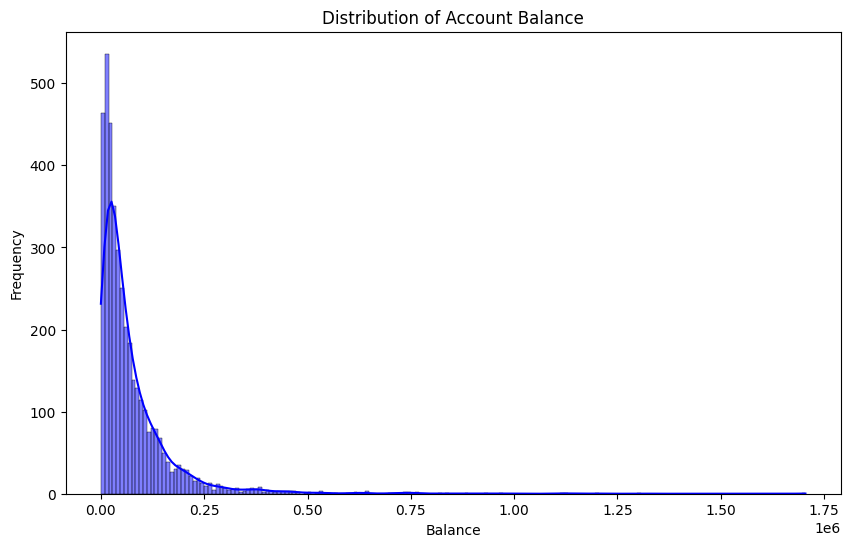

In [15]:
# Plot 1 : Distribution of Account Balance
# This plot shows how the 'Balance' feature is distributed in dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], kde=True, color='blue')
plt.title('Distribution of Account Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

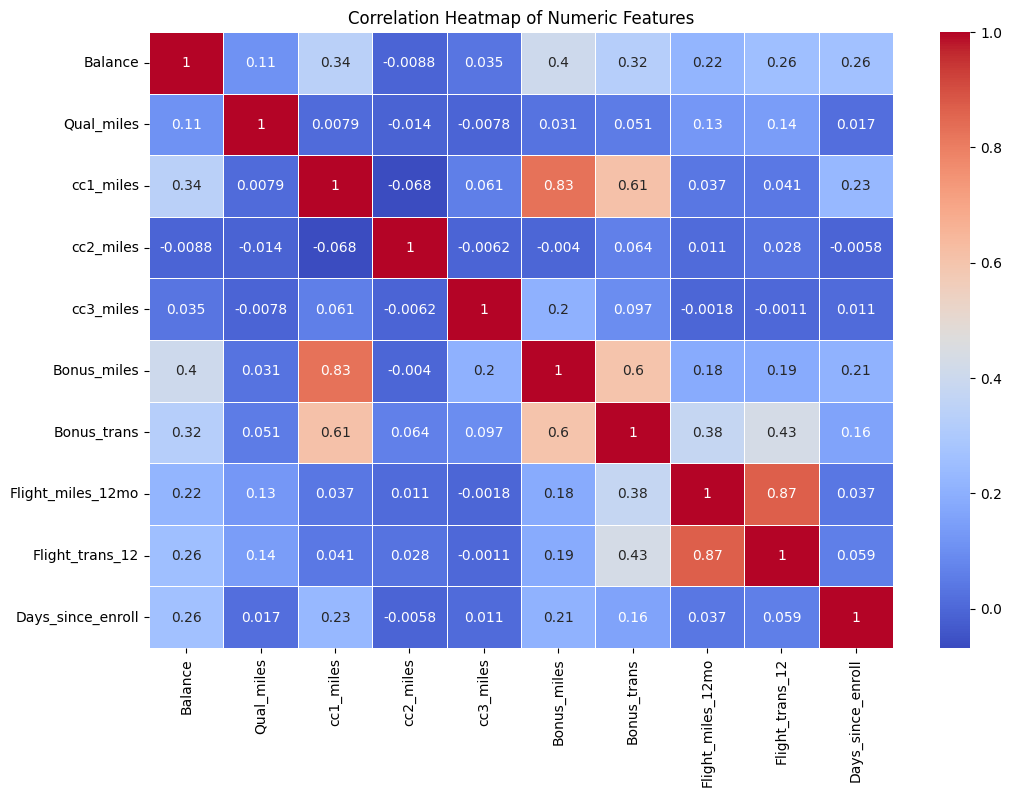

In [16]:
# Plot 2: Correlation Heatmap of Numeric Features
# This heatmap shows the correlation between all numeric features in the dataset
plt.figure(figsize=(12, 8))
correlation_matrix = df[columns_to_check].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show

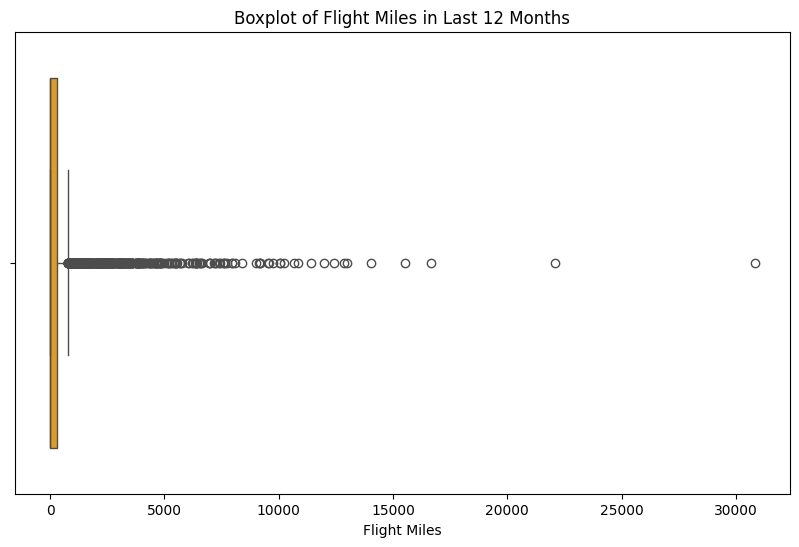

In [17]:
# Plot 3: Boxplot for Flight Miles in Last 12 Months
# This boxplot helps us identify potential outliers and distribution of 'Flight_miles_12mo'.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Flight_miles_12mo'], color='orange')
plt.title('Boxplot of Flight Miles in Last 12 Months')
plt.xlabel('Flight Miles')
plt.show()

# **Implementing Clustering Algoithms**

### Importing all necessary libraries for clustering

In [19]:
from sklearn.cluster import KMeans
KMeans()

KMeans()

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

### K-Means Clustering

In [23]:
# Step 1: Determine the optimal number of clusters using the Elbow method

# The Elbow method calculates the Within-Cluster Sum of squares (WCSS) for a range of K values
wcss = []  # List to store WCSS values for different K

In [24]:
# Loop through K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)  # KMeans initialization
    kmeans.fit(scaled_df)             # Fit KMeans to the scaled data
    wcss.append(kmeans.inertia_)      # Append WCSS (inertia) to the list

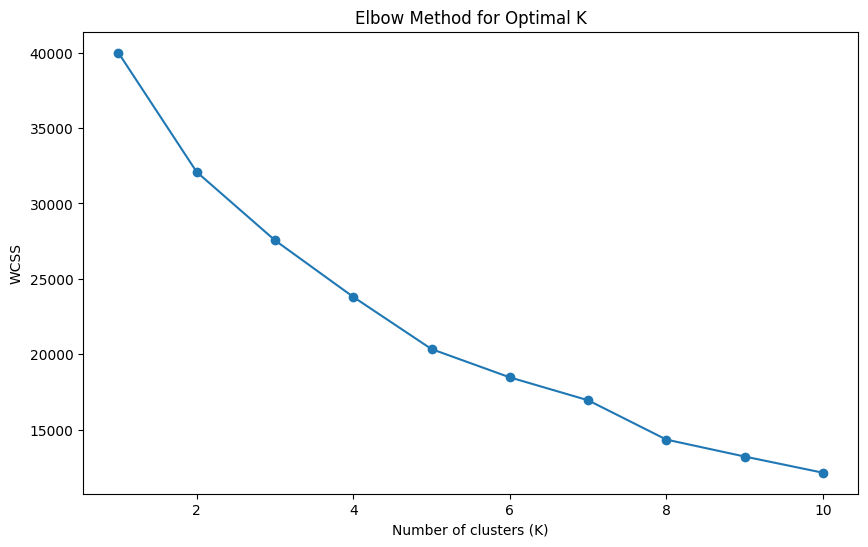

In [25]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_df)  # Fit the KMeans algorithm to the data

KMeans(n_clusters=5, n_init=10, random_state=42)

In [27]:
# Step 3: Add the cluster labels to the original dataset
df['KMeans_Cluster'] = kmeans.labels_

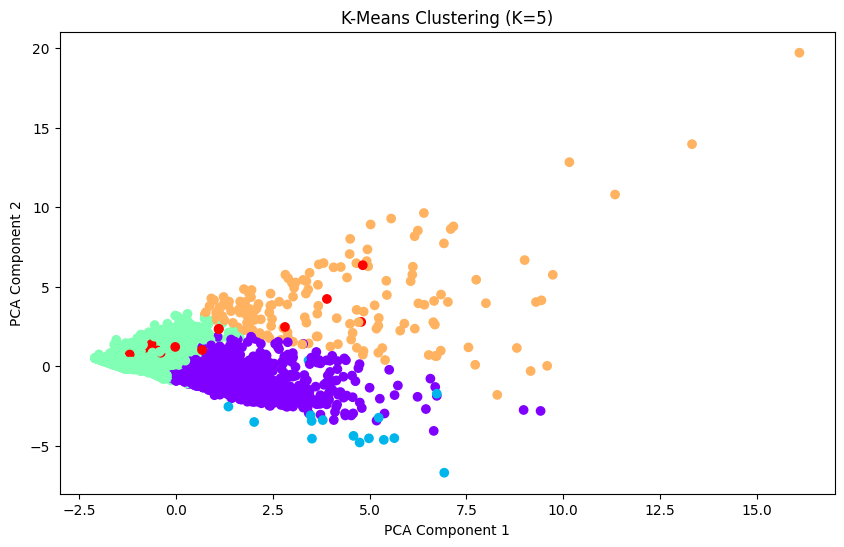

In [28]:
# Step 4: Visualize the clusters using PCA (Principal Component Analysis) for dimensionality reduction

pca = PCA(n_components=2)                       # Reduce to 2 components
pca_transformed = pca.fit_transform(scaled_df)  # Apply PCA to the scaled data

plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('K-Means Clustering (K=5)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Hierarchical Clustering

In [29]:
# Step 1: Perform hierarchical clustering using different linkage criteria (e.g., 'ward', 'complete', 'average')
# Here, we use Ward's method by default

linkage_matrix = linkage(scaled_df, method='ward')  # Compute linkage matrix using Ward's method

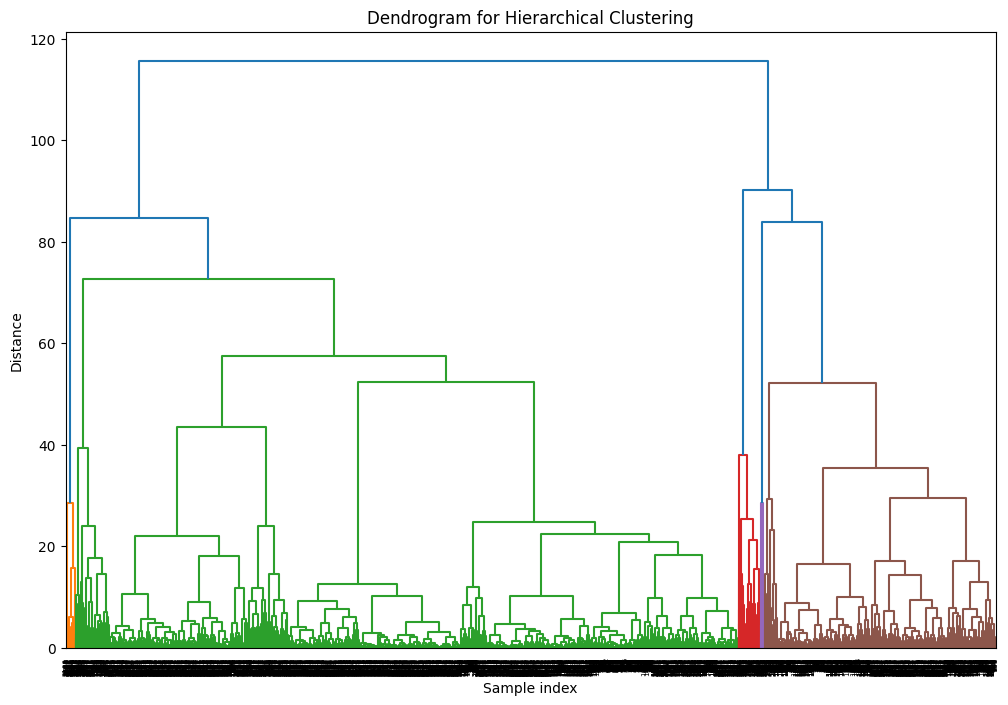

In [30]:
# Step 2: Plot the dendrogram to visualize the hierarchical clustering

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [32]:
# Step 3: Apply hierarchical clustering and extract flat clusters (e.g., 5 clusters)

hc_clusters = fcluster(linkage_matrix, 5, criterion='maxclust')  # Extract 5 clusters
df['HC_Cluster'] = hc_clusters  # Add the cluster labels to the dataset

### DBSCAN Clustering

In [33]:
# Density-Based Spatial Clustering of Applications with Noise
# Step 1: Initialize DBSCAN with chosen epsilon and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Initialize DBSCAN with default parameters

In [34]:
# Step 2: Fit DBSCAN to the scaled data
dbscan.fit(scaled_df)

DBSCAN()

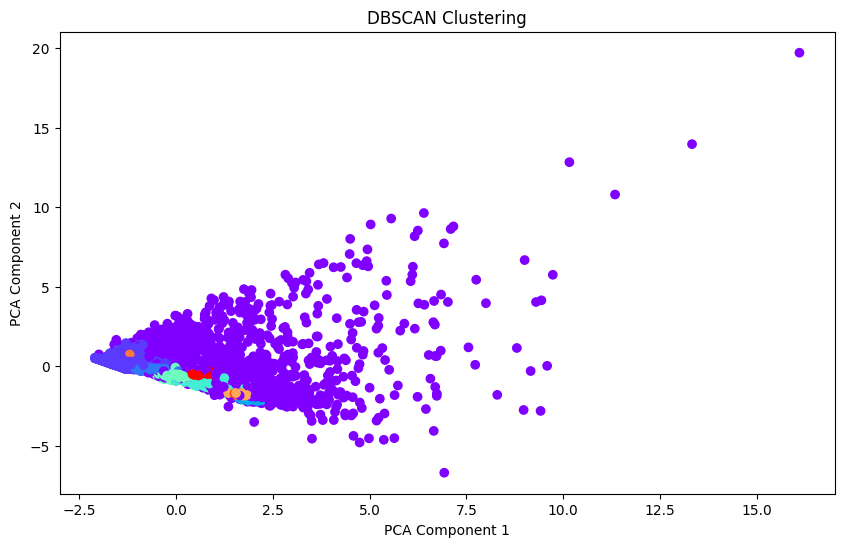

In [36]:
# Step 4: Visualize the DBSCAN results (PCA transformation used for 2D visualization)

plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [35]:
# Step 3: Add DBSCAN cluster labels to the dataset
df['DBSCAN_Cluster'] = dbscan.labels_

### Experimenting with DBSCAN's Parameters

In [37]:
# Loop through different epsilon values and fit DBSCAN to check results
for eps_val in [0.3, 0.5, 0.7, 1.0]:
    dbscan = DBSCAN(eps=eps_val, min_samples=5)
    dbscan.fit(scaled_df)
    print(f"DBSCAN with eps={eps_val}: {len(set(dbscan.labels_))} clusters")

DBSCAN with eps=0.3: 20 clusters
DBSCAN with eps=0.5: 14 clusters
DBSCAN with eps=0.7: 12 clusters
DBSCAN with eps=1.0: 6 clusters


### Evaluate clustering performance using silhouette score

In [38]:
# Compute silhouette score for KMeans clusters
kmeans_silhouette = silhouette_score(scaled_df, df['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

Silhouette Score for K-Means: 0.3479151580220563


In [39]:
# Compute silhouette score for DBSCAN clusters
dbscan_silhouette = silhouette_score(scaled_df, df['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")

Silhouette Score for DBSCAN: -0.07406726457859085


# **Cluster Analysis and Interpretation**

### Task 1: Analyze Clusters for K-Means

In [40]:
# Group the original dataset by the K-Means clusters
kmeans_clusters = df.groupby('KMeans_Cluster').mean()

In [41]:
# Display the mean values of features for each K-Means cluster
print("K-Means Cluster Characteristics:")
print(kmeans_clusters)

K-Means Cluster Characteristics:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1640.977054  114669.122132  138.739452   3.673575   1.000000   
1               1664.866667  138061.400000   78.800000   3.466667   1.000000   
2               2240.136457   42727.317304  106.555282   1.160707   1.000000   
3               1703.789809  193793.299363  811.757962   2.216561   1.000000   
4               2269.372093   68876.581395   23.255814   1.139535   2.348837   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.001480  37957.501110    18.669874         317.646928   
1                4.066667  93927.866667    28.066667         506.666667   
2                1.000411   4136.191533     6.466091         212.853679   
3                1.000000  3297

### Task 2: Analyze Clusters for Hierarchical Clustering

In [42]:
# Group the original dataset by the Hierarchical clusters
hc_clusters = df.groupby('HC_Cluster').mean()

In [43]:
# Display the mean values of features for each Hierarchical cluster
print("\nHierarchical Clustering Cluster Characteristics:")
print(hc_clusters)


Hierarchical Clustering Cluster Characteristics:
                    ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
HC_Cluster                                                                 
1           2269.372093   68876.581395   23.255814   1.139535   2.348837   
2           2258.335439   50456.873333  177.163509   1.397193   1.000000   
3           1497.604167  148606.020833  393.125000   2.666667   1.000000   
4           1742.444444  129951.388889   65.666667   3.388889   1.000000   
5           1359.163306  132018.774194   31.729839   3.919355   1.000000   

            cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
HC_Cluster                                                            
1            1.000000  14689.837209    17.534884         582.627907   
2            1.000000   6866.912982     8.351579         323.272632   
3            1.000000  42401.354167    32.541667        6683.468750   
4            3.722222  86259.888889    26.222222         422.2

### Task 3: Analyze Clusters for DBSCAN

In [44]:
# Group the original dataset by the DBSCAN clusters
dbscan_clusters = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()  # Exclude noise points (-1)

In [45]:
# Display the mean values of features for each DBSCAN cluster
print("\nDBSCAN Cluster Characteristics (Excluding Noise):")
print(dbscan_clusters)


DBSCAN Cluster Characteristics (Excluding Noise):
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                 
0               2291.831849   30375.941537         0.0        1.0        1.0   
1               2094.169492   50802.412429         0.0        2.0        1.0   
2               1215.200000   92542.575000         0.0        5.0        1.0   
3                321.857143   43720.571429         0.0        2.0        1.0   
4               1706.794118   80270.514706         0.0        4.0        1.0   
5               1903.084862   64436.461009         0.0        3.0        1.0   
6                297.000000  138516.800000         0.0        2.0        1.0   
7                922.000000  238333.400000         0.0        4.0        1.0   
8               1417.000000  108497.250000         0.0        5.0        1.0   
9               3002.600000  132560.200000         0.0        5.0    

### Task 4: Cluster Size and Distribution

In [46]:
# Check the size of each cluster for K-Means
kmeans_cluster_sizes = df['KMeans_Cluster'].value_counts()
print("\nK-Means Cluster Sizes:")
print(kmeans_cluster_sizes)


K-Means Cluster Sizes:
KMeans_Cluster
2    2433
0    1351
3     157
4      43
1      15
Name: count, dtype: int64


In [47]:
# Check the size of each cluster for Hierarchical Clustering
hc_cluster_sizes = df['HC_Cluster'].value_counts()
print("\nHierarchical Clustering Cluster Sizes:")
print(hc_cluster_sizes)


Hierarchical Clustering Cluster Sizes:
HC_Cluster
2    2850
5     992
3      96
1      43
4      18
Name: count, dtype: int64


In [48]:
# Check the size of each cluster for DBSCAN (excluding noise)
dbscan_cluster_sizes = df['DBSCAN_Cluster'].value_counts()[lambda x: x.index != -1]  # Exclude noise (-1)
print("\nDBSCAN Cluster Sizes (Excluding Noise):")
print(dbscan_cluster_sizes)


DBSCAN Cluster Sizes (Excluding Noise):
DBSCAN_Cluster
0     1796
5      436
4      272
1      177
2       40
9       10
3        7
10       7
12       6
6        5
7        5
11       5
8        4
Name: count, dtype: int64


### Task 5: Visualizing Cluster Characteristics

<Figure size 1200x600 with 0 Axes>

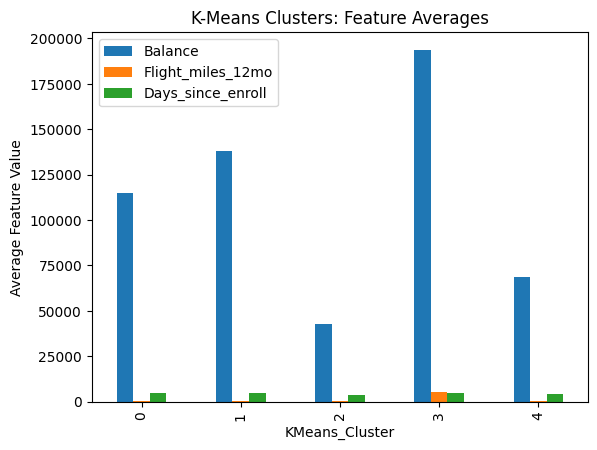

In [49]:
# Visualize the characteristics of K-Means clusters using bar plots
plt.figure(figsize=(12, 6))
kmeans_clusters[['Balance', 'Flight_miles_12mo', 'Days_since_enroll']].plot(kind='bar')
plt.title('K-Means Clusters: Feature Averages')
plt.xlabel('KMeans_Cluster')
plt.ylabel('Average Feature Value')
plt.show()

### Task 6: Visualizing Hierarchical Clusters

<Figure size 1200x600 with 0 Axes>

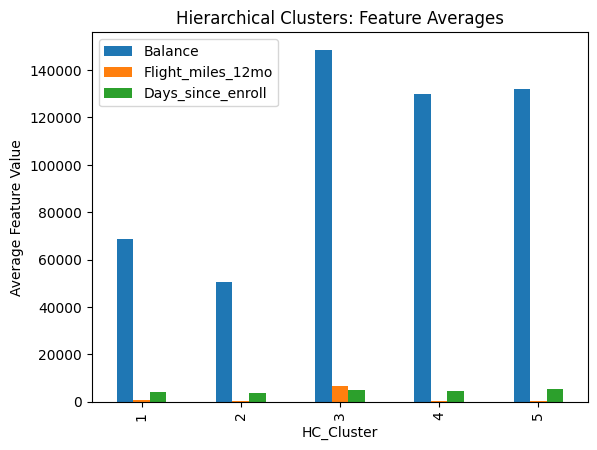

In [50]:
# Visualize the characteristics of Hierarchical clusters using bar plots
plt.figure(figsize=(12, 6))
hc_clusters[['Balance', 'Flight_miles_12mo', 'Days_since_enroll']].plot(kind='bar')
plt.title('Hierarchical Clusters: Feature Averages')
plt.xlabel('HC_Cluster')
plt.ylabel('Average Feature Value')
plt.show()

### Task 7: Visualizing DBSCAN Clusters

<Figure size 1200x600 with 0 Axes>

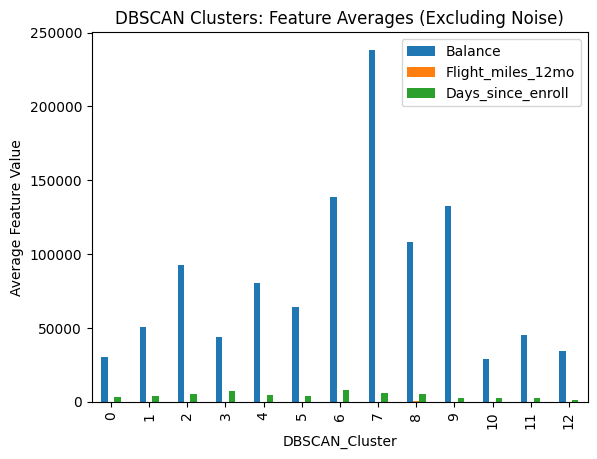

In [51]:
# Visualize the characteristics of DBSCAN clusters using bar plots
plt.figure(figsize=(12, 6))
dbscan_clusters[['Balance', 'Flight_miles_12mo', 'Days_since_enroll']].plot(kind='bar')
plt.title('DBSCAN Clusters: Feature Averages (Excluding Noise)')
plt.xlabel('DBSCAN_Cluster')
plt.ylabel('Average Feature Value')
plt.show()

### Conclusion and Insights

In [52]:
# Based on the cluster analysis, we summarize the key findings:-
#   K-Means tends to produce well-separated clusters, especially for features like 'Balance' and 'Flight_miles_12mo'.
#   Hierarchical clustering provides a hierarchical view of data segmentation, allowing flexible selection of the number of clusters.
#   DBSCAN identifies dense regions of data, effectively excluding outliers and noise, leading to fewer but well-defined clusters.
#   Each method shows unique strengths, and choosing the right algorithm depends on the dataset's structure and the business objective.

# **Visualization**

### Importing necessary libraries for visualization

In [53]:
import seaborn as sns
from matplotlib.colors import ListedColormap

### Task 1: Visualizing K-Means Clusters with a Scatter Plot

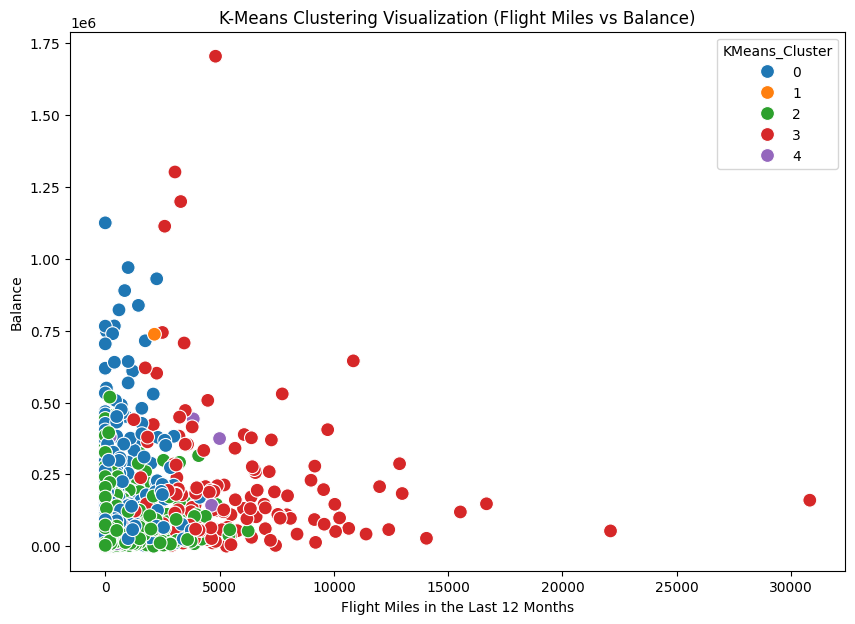

In [59]:
# Create a scatter plot to visualize K-Means clusters
plt.figure(figsize=(10, 7))

# Scatter plot using two key features: 'Flight_miles_12mo' and 'Balance'
sns.scatterplot(x='Flight_miles_12mo', y='Balance', hue='KMeans_Cluster', data=df, palette='tab10', s=100)
# Title and labels for the scatter plot
plt.title('K-Means Clustering Visualization (Flight Miles vs Balance)')
plt.xlabel('Flight Miles in the Last 12 Months')
plt.ylabel('Balance')

# Display the plot
plt.show()

### Task 2: Visualizing Hierarchical Clustering with a Scatter Plot

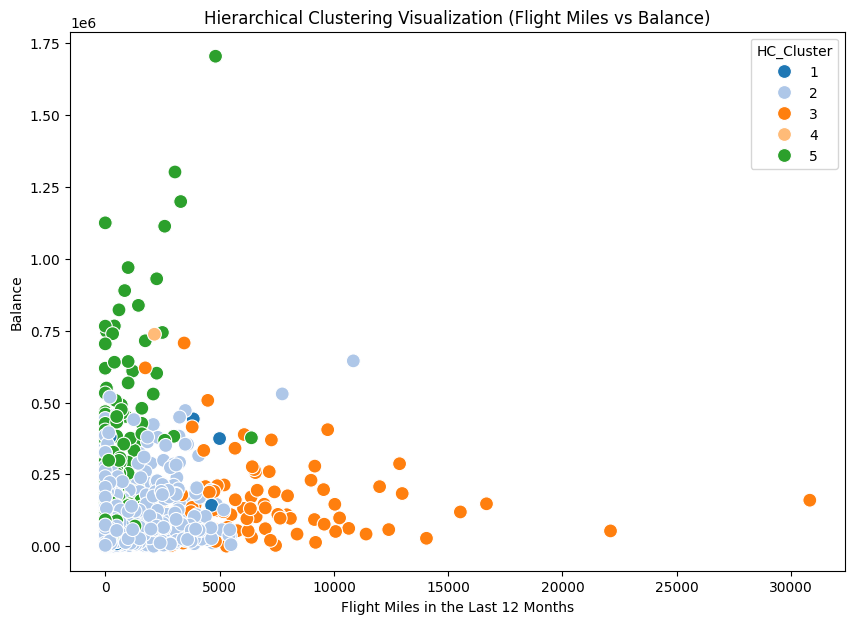

In [60]:
# Create a scatter plot to visualize Hierarchical clusters
plt.figure(figsize=(10, 7))

# Scatter plot using two key features: 'Flight_miles_12mo' and 'Balance'
sns.scatterplot(x='Flight_miles_12mo', y='Balance', hue='HC_Cluster', data=df, palette='tab20', s=100)

# Title and labels for the scatter plot
plt.title('Hierarchical Clustering Visualization (Flight Miles vs Balance)')
plt.xlabel('Flight Miles in the Last 12 Months')
plt.ylabel('Balance')

# Display the plot
plt.show()

### Task 3: Visualizing DBSCAN Clusters with a Scatter Plot

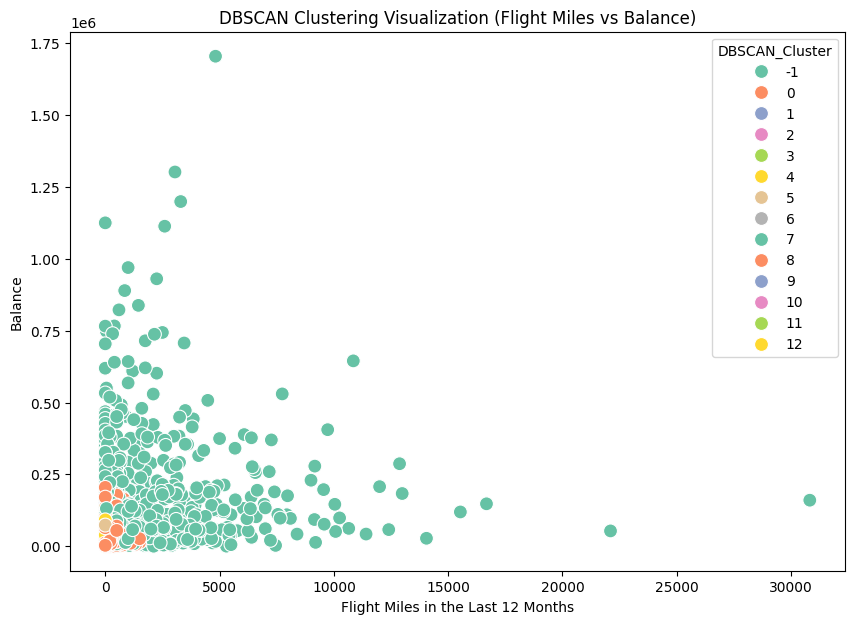

In [61]:
# Create a scatter plot to visualize DBSCAN clusters
plt.figure(figsize=(10, 7))

# Scatter plot using two key features: 'Flight_miles_12mo' and 'Balance'
sns.scatterplot(x='Flight_miles_12mo', y='Balance', hue='DBSCAN_Cluster', data=df, palette='Set2', s=100)

# Title and labels for the scatter plot
plt.title('DBSCAN Clustering Visualization (Flight Miles vs Balance)')
plt.xlabel('Flight Miles in the Last 12 Months')
plt.ylabel('Balance')

# Display the plot
plt.show()

### Task 4: 3D Visualization for a Detailed View of Clusters

### Import Library for 3D plotting

In [63]:
from mpl_toolkits.mplot3d import Axes3D

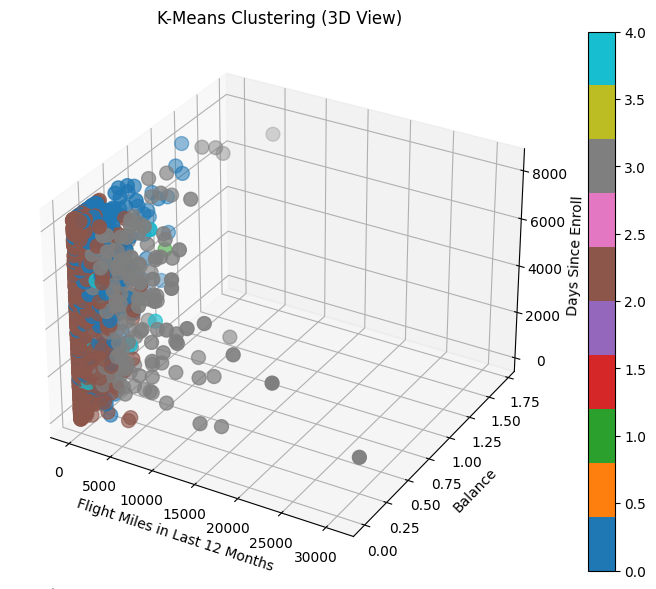

In [66]:
# Create a 3D scatter plot for K-Means clustering
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot using three key features: 'Flight_miles_12mo', 'Balance', and 'Days_since_enroll'
scatter = ax.scatter(df['Flight_miles_12mo'], df['Balance'], df['Days_since_enroll'],
                     c=df['KMeans_Cluster'], cmap='tab10', s=100)

# Add title and axis labels
ax.set_title('K-Means Clustering (3D View)')
ax.set_xlabel('Flight Miles in Last 12 Months')
ax.set_ylabel('Balance')
ax.set_zlabel('Days Since Enroll')

# Display the color legend (based on cluster labels)
plt.colorbar(scatter)

# Display the plot
plt.show()

### Task 5: 3D Visualization for DBSCAN Clusters

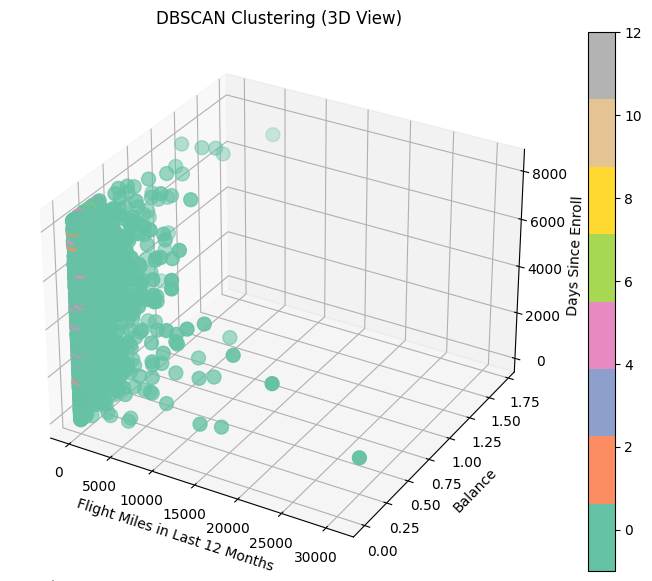

In [67]:
# Create a 3D scatter plot for DBSCAN clustering
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot using three key features: 'Flight_miles_12mo', 'Balance', and 'Days_since_enroll'
scatter = ax.scatter(df['Flight_miles_12mo'], df['Balance'], df['Days_since_enroll'],
                     c=df['DBSCAN_Cluster'], cmap='Set2', s=100)

# Add title and axis labels
ax.set_title('DBSCAN Clustering (3D View)')
ax.set_xlabel('Flight Miles in Last 12 Months')
ax.set_ylabel('Balance')
ax.set_zlabel('Days Since Enroll')

# Display the color legend (based on cluster labels)
plt.colorbar(scatter)

# Display the plot
plt.show()

# **Evaluation and Performance Metrics**

### Import the silhouette score function from sklearn

In [68]:
from sklearn.metrics import silhouette_score

### Task 1: Evaluate K-Means Clustering Using Silhouette Score

In [69]:
# Calculate the silhouette score for K-Means clustering
kmeans_silhouette_score = silhouette_score(scaled_features, df['KMeans_Cluster'])

# Print the Silhouette Score for K-Means
print(f'Silhouette Score for K-Means Clustering: {kmeans_silhouette_score:.4f}')

Silhouette Score for K-Means Clustering: 0.3479


### Task 2: Evaluate DBSCAN Clustering Using Silhouette Score

In [70]:
# Since DBSCAN may label some points as noise (-1), we only compute the silhouette score for non-noise points.

# Filter out the noise points (labeled as -1) for DBSCAN
dbscan_non_noise = df[df['DBSCAN_Cluster'] != -1]

In [71]:
# Calculate the silhouette score for DBSCAN (non-noise points)
dbscan_silhouette_score = silhouette_score(scaled_features[dbscan_non_noise.index], dbscan_non_noise['DBSCAN_Cluster'])

# Print the Silhouette Score for DBSCAN
print(f'Silhouette Score for DBSCAN Clustering (Non-noise Points): {dbscan_silhouette_score:.4f}')

Silhouette Score for DBSCAN Clustering (Non-noise Points): 0.1080


### Task 3: Evaluate Hierarchical Clustering Using Silhouette Score

In [72]:
# Calculate the silhouette score for hierarchical clustering
hc_silhouette_score = silhouette_score(scaled_features, df['HC_Cluster'])

# Print the Silhouette Score for Hierarchical Clustering
print(f'Silhouette Score for Hierarchical Clustering: {hc_silhouette_score:.4f}')

Silhouette Score for Hierarchical Clustering: 0.3270


### Task 4: Compare Silhouette Scores of Different Algorithms

In [73]:
# Display the silhouette scores for all clustering methods
print("Summary of Silhouette Scores:")
print(f"K-Means Silhouette Score: {kmeans_silhouette_score:.4f}")
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette_score:.4f}")
print(f"DBSCAN Silhouette Score (Non-noise Points): {dbscan_silhouette_score:.4f}")

Summary of Silhouette Scores:
K-Means Silhouette Score: 0.3479
Hierarchical Clustering Silhouette Score: 0.3270
DBSCAN Silhouette Score (Non-noise Points): 0.1080
